## 결정 트리 (Decision Tree)

- 'Churn'을 타겟 데이터로 하여 테스트
- 뽑을 평가 지표: 정확도(Accuracy), 정밀도(Precision), F1-score, ROC 커브
- 통일할 파라미터: test_size=0.2, random_state=42

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드
df = pd.read_csv('../data/gym_churn_us.csv')

In [4]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 타겟 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# 예측 수행
y_pred = dt_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"결정트리 정확도(Accuracy): {accuracy:.4f}")

# 정밀도 평가
precision = precision_score(y_test, y_pred)
print(f"결정트리 정밀도(Precision): {precision:.4f}")

# 재현율 평가
recall = recall_score(y_test, y_pred)
print(f"결정트리 재현율(Recall): {recall:.4f}")

# F1 Score (정밀도와 재현율의 조화 평균)
f1 = f1_score(y_test, y_pred)
print(f"결정트리 F1-score: {f1:.4f}")

# AUC (ROC 커브 아래의 면적)
# 확률 예측 수행
y_prob = dt_model.predict_proba(X_test)[:, 1]
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# AUC 계산
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC: {roc_auc:.4f}')

결정트리 정확도(Accuracy): 0.8762
결정트리 정밀도(Precision): 0.7562
결정트리 재현율(Recall): 0.7525
결정트리 F1-score: 0.7543
ROC-AUC: 0.8353


- 시각화

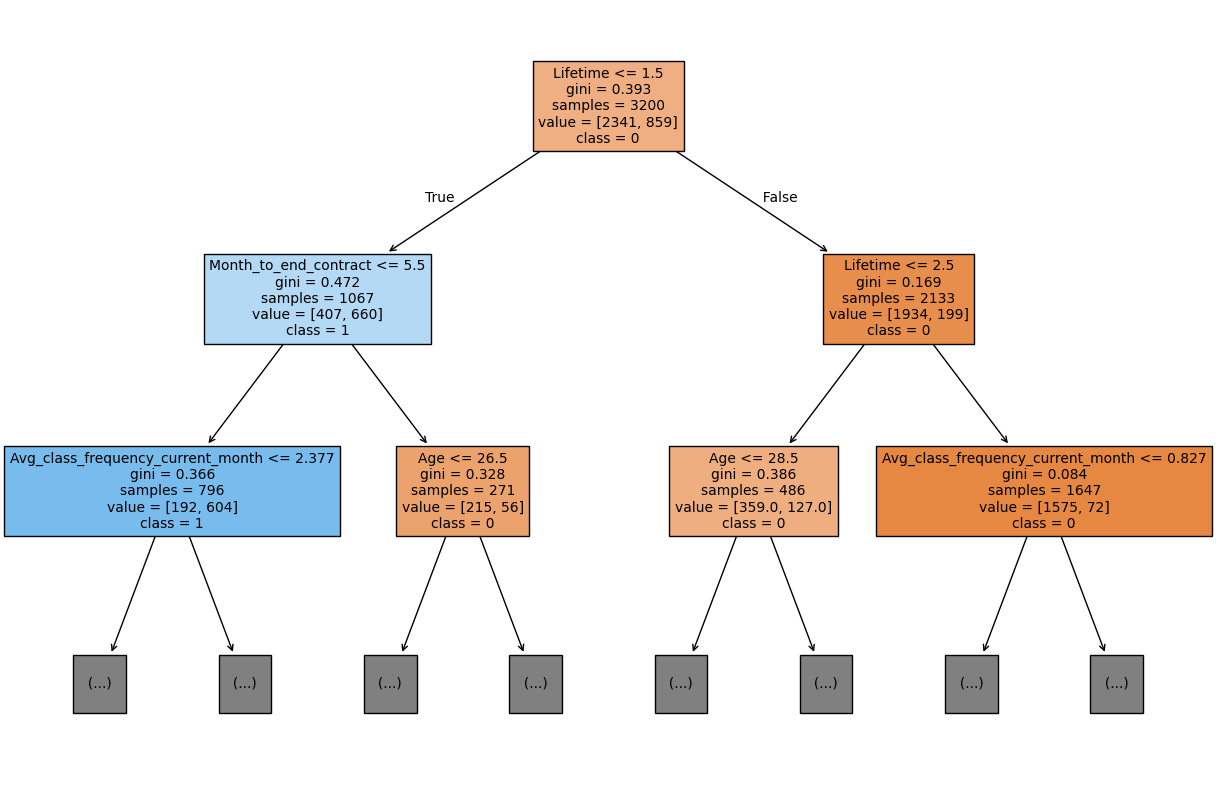

In [135]:
# 결정트리 시각화
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt_model.classes_], max_depth=2, fontsize=10)
plt.show()

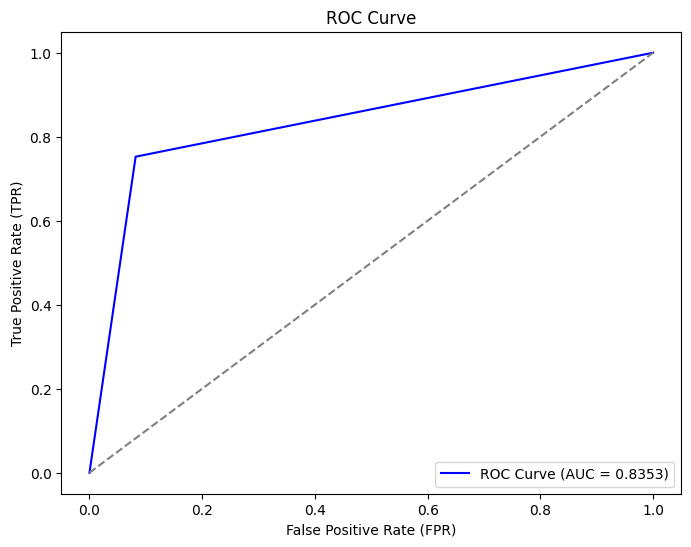

In [136]:
# 결정트리 ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- 하이퍼 파라미터 탐색 (성능 향상)

In [137]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 설정 (grid)
param_grid = {
    'criterion': ['gini', 'entropy'],       # 분할 기준
    'max_depth': [3, 5, 10, 15, None],      # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],        # 노드를 나누는 최소 샘플 개수
    'min_samples_leaf': [1, 2, 5]           # 리프 노드의 최소 샘플 개수
}

# GridSearchCV 실행 (cv(교차 검증): 5-Fold)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 확인
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 검증 정확도:", grid_search.best_score_)

# 최적의 모델 적용
best_dt = grid_search.best_estimator_

최적의 하이퍼파라미터: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 검증 정확도: 0.9034375000000001


In [139]:
# 최적 모델로 예측 수행
y_pred = best_dt.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"결정트리 정확도(Accuracy): {accuracy:.4f}")

# 정밀도 평가
precision = precision_score(y_test, y_pred)
print(f"결정트리 정밀도(Precision): {precision:.4f}")

# 재현율 평가
recall = recall_score(y_test, y_pred)
print(f"결정트리 재현율(Recall): {recall:.4f}")

# F1 Score (정밀도와 재현율의 조화 평균)
f1 = f1_score(y_test, y_pred)
print(f"결정트리 F1-score: {f1:.4f}")

# AUC (ROC 커브 아래의 면적)
# 확률 예측 수행
y_prob = best_dt.predict_proba(X_test)[:, 1]
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# AUC 계산
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC: {roc_auc:.4f}')


결정트리 정확도(Accuracy): 0.8812
결정트리 정밀도(Precision): 0.8092
결정트리 재현율(Recall): 0.6931
결정트리 F1-score: 0.7467
ROC-AUC: 0.9064


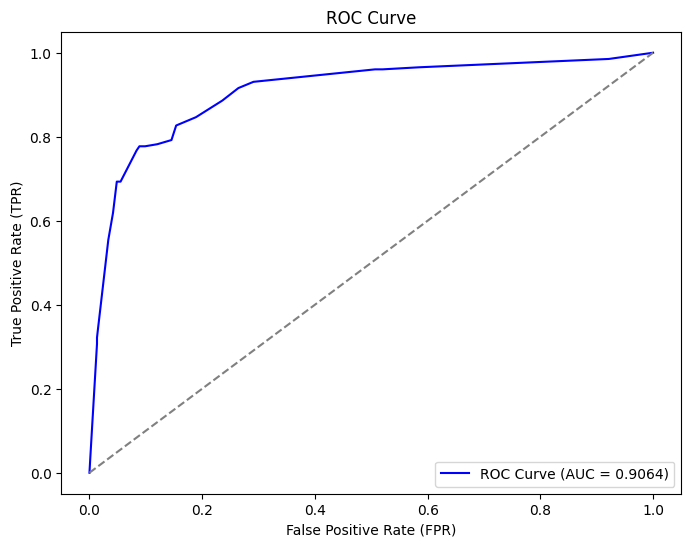

ROC커브의 AUC: 0.9064


In [140]:
# 최적 하이퍼 파라미터 결정트리 ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'ROC커브의 AUC: {roc_auc:.4f}')

|평가지표|초기점수|최적 하이퍼 파라미터 적용|
|---|---|---|
|결정트리 정확도(Accuracy)|0.8762 |0.8812|
|결정트리 정밀도(Precision)|0.7562 |0.8092|
|결정트리 재현율(Recall)|0.7525 | 0.6931|
|결정트리 F1-score|0.7543 | 0.7467|
|결정트리 ROC-AUC|0.8353|0.9064|